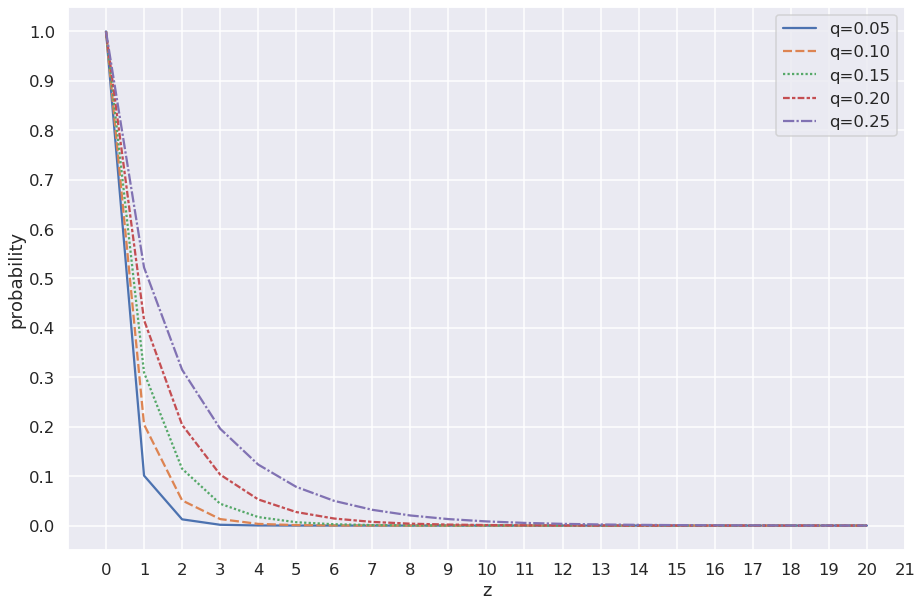

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def attcker_success(q, z):    
    p = 1.0 - q
    l = z * (q/p)
    sum = 1.0
    for k in range(0, z+1):
        poisson = np.exp(-l)
        for i in range(1, k+1):
            poisson *= l / i
        sum -= poisson * (1 - np.power(q/p, z-k))
    return sum

def attcker_data(q, z):
    probability = []
    for z_prg in range(z+1):
        probability.append(attcker_success(q, z_prg))
    return probability

probability_list = []
q_value_list = np.arange(0.05, 0.3, 0.05)

for q_value in q_value_list:
    probability_list.append(attcker_data(q_value, 20))
df = pd.DataFrame(probability_list, index=["q=0.05","q=0.10","q=0.15","q=0.20","q=0.25"])
df = df.T

sns.set(style="darkgrid")
sns.set_context("talk")
plt.figure(figsize=(15, 10))
plt.xlabel('z')
plt.ylabel('probability')
plt.xticks( np.arange(0, 22, 1) )
plt.yticks( np.arange(0, 1.1, 0.1) )
sns.lineplot(data=df)